# Loan Application Status Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:/Users/Devu/Downloads/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

Number of rows is 614 and number of columns is 13

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are categorical as well as continuous values

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

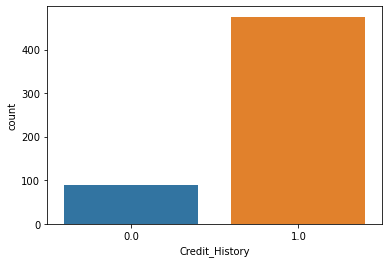

In [10]:
#Checking unique values and its visualization of catagorical columns
sns.countplot(x=df['Credit_History'],data=df)
df['Credit_History'].value_counts()

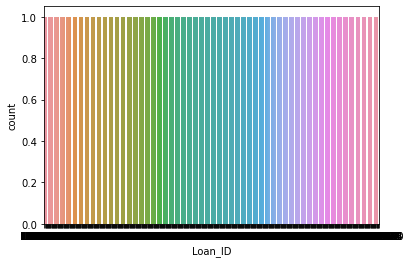

LP002434    1
LP002367    1
LP002543    1
LP001572    1
LP001319    1
           ..
LP002487    1
LP002958    1
LP001245    1
LP002422    1
LP001765    1
Name: Loan_ID, Length: 614, dtype: int64


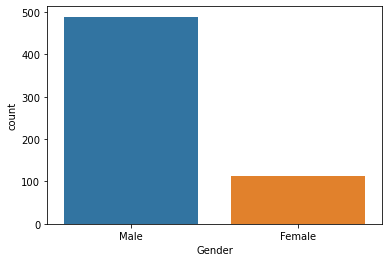

Male      489
Female    112
Name: Gender, dtype: int64


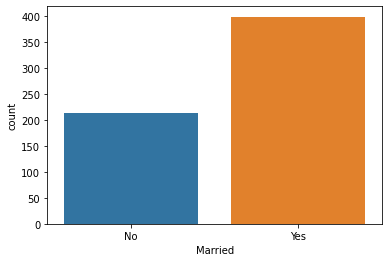

Yes    398
No     213
Name: Married, dtype: int64


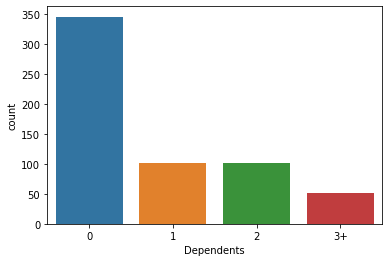

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


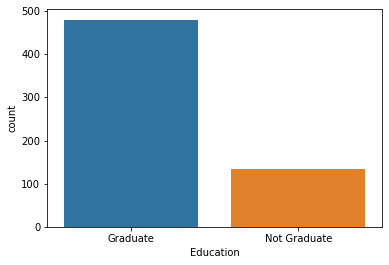

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


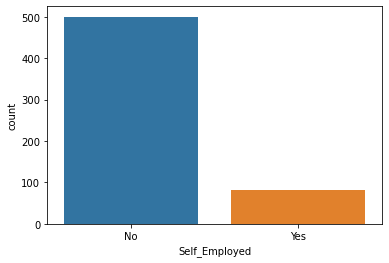

No     500
Yes     82
Name: Self_Employed, dtype: int64


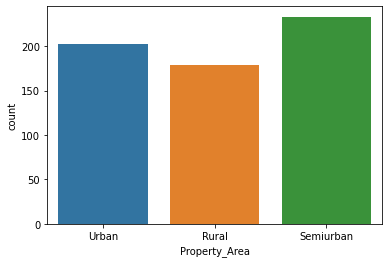

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


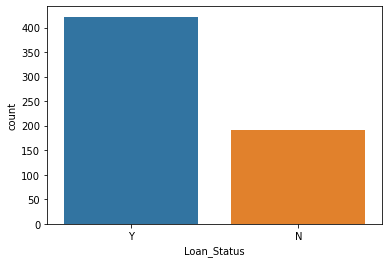

Y    422
N    192
Name: Loan_Status, dtype: int64


In [11]:
for i in df.columns:
    if df[i].dtypes=='object':
        sns.countplot(x=df[i],data=df)
        plt.show()
        print(df[i].value_counts())

- Number of males are more than females
- Most of the people are married
- Majority of loan seekers are graduates
- Number of self-employed are very less as compared to not self-employed
- People from semi urban area are more than udban and rural in order
- Loan status count is more for Yes than No

<AxesSubplot:>

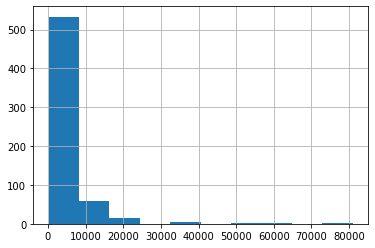

In [13]:
df['ApplicantIncome'].hist()

Most of the Applicants have income less then 10000

## Replacing null values

In [16]:
df['Gender']=df['Gender'].replace(np.nan,'Male')
df['Married']=df['Married'].replace(np.nan,'Yes')
df['Dependents']=df['Dependents'].replace(np.nan,0)
df['Self_Employed']=df['Self_Employed'].replace(np.nan,'No')
df['Credit_History']=df['Credit_History'].fillna(method='ffill')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(method='ffill')
df['LoanAmount']=df['LoanAmount'].interpolate()
df['LoanAmount']=df['LoanAmount'].fillna(method='bfill')

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

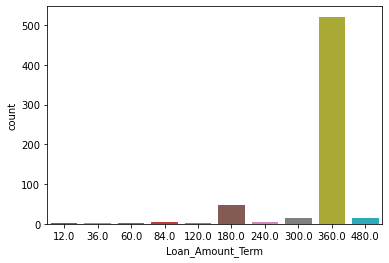

In [19]:
sns.countplot(x=df['Loan_Amount_Term'],data=df)

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

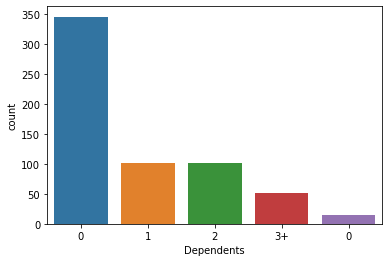

In [20]:
sns.countplot(x=df['Dependents'],data=df)
df['Dependents'].value_counts()

In [21]:
df['Dependents']=df['Dependents'].replace(0,'0')

## EDA

### Gender vs Loan status

<AxesSubplot:xlabel='Gender', ylabel='count'>

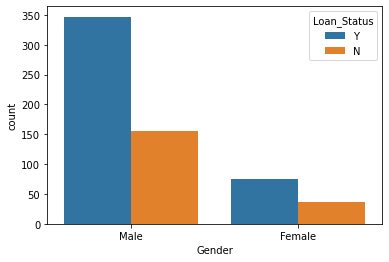

In [22]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'],data=df)

Males take more loans than females

Married vs Loan status

<AxesSubplot:xlabel='Married', ylabel='count'>

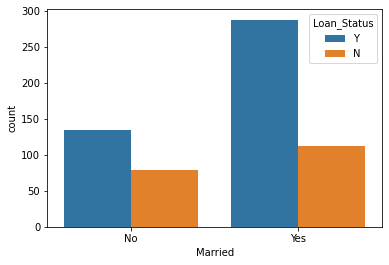

In [23]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'],data=df)

Married people tend to take more loan than unmarried people

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

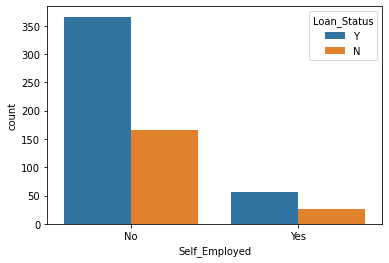

In [25]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'],data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

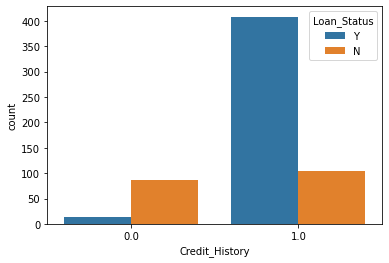

In [26]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'],data=df)

Most people tend to pay off their loans

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

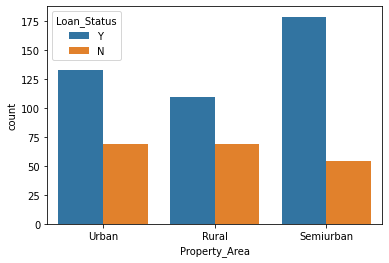

In [28]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'],data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

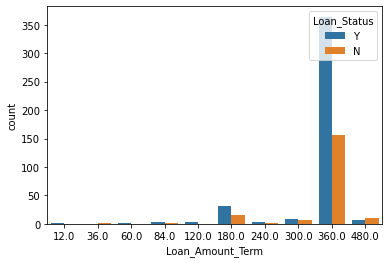

In [29]:
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],data=df)

Many people go for 360 loan

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [32]:
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [34]:
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## Correlation 

In [35]:
df.corr()['Loan_Status']

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.042259
Loan_Amount_Term    -0.033378
Credit_History       0.525152
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

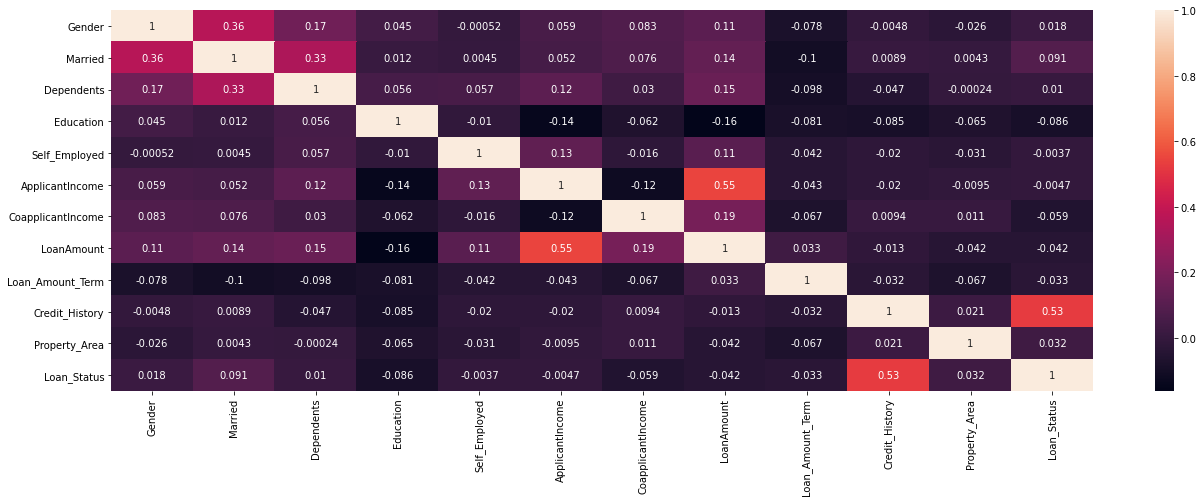

In [36]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Credit History is highly corelated with our loan_status column

As we have index number,Loan_id is not necessary

In [ ]:
df=df.drop('Loan_ID',axis=1)

In [38]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## Checking Outliers

<AxesSubplot:xlabel='ApplicantIncome'>

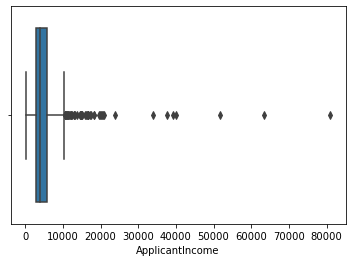

In [39]:
sns.boxplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

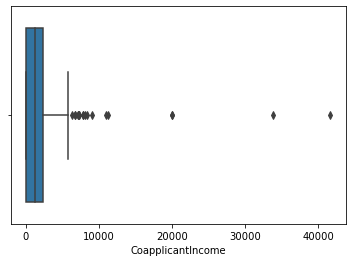

In [40]:
sns.boxplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

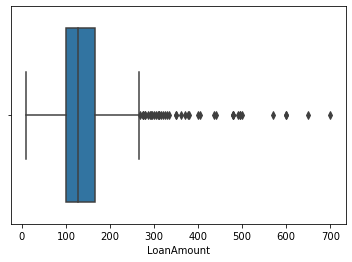

In [41]:
sns.boxplot(df['LoanAmount'])

In [42]:
df[df['ApplicantIncome']>50000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,1,1,3,0,0,51763,0.0,700.0,300.0,1.0,2,1
333,1,1,0,0,0,63337,0.0,490.0,180.0,1.0,2,1
409,1,1,3,0,0,81000,0.0,360.0,360.0,0.0,0,0


409 no.row is outlier as applicant income is 81000 and loanamount term is 360, hence we remove this row

In [43]:
df=df.drop(409,axis=0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [44]:
df[df['CoapplicantIncome']>20000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,1,0,0,0,0,1836,33837.0,90.0,360.0,1.0,2,0
600,0,0,3,0,0,416,41667.0,350.0,180.0,1.0,2,0


In [45]:
df=df.drop([581,600],axis=0)

In [46]:
df[df['LoanAmount']>550]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,1,0,0,0,1,20166,0.0,650.0,480.0,0.0,2,1
155,1,1,3,0,0,39999,0.0,600.0,180.0,0.0,1,1
171,1,1,3,0,0,51763,0.0,700.0,300.0,1.0,2,1
369,1,1,0,0,0,19730,5266.0,570.0,360.0,1.0,0,0
561,0,1,1,0,1,19484,0.0,600.0,360.0,1.0,1,1


In [47]:
df=df.drop([130,155,171,369,561],axis=0)

In [48]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## Skewness

In [49]:
df.skew()

Gender              -1.656636
Married             -0.646596
Dependents           1.025631
Education            1.347319
Self_Employed        2.179586
ApplicantIncome      5.623420
CoapplicantIncome    3.379401
LoanAmount           2.046877
Loan_Amount_Term    -2.355446
Credit_History      -1.842112
Property_Area       -0.061126
Loan_Status         -0.822504
dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

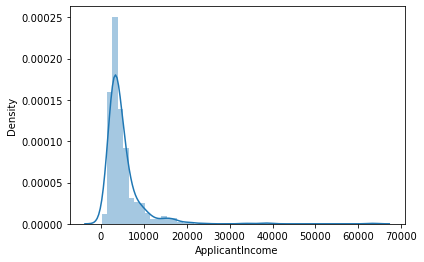

In [50]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

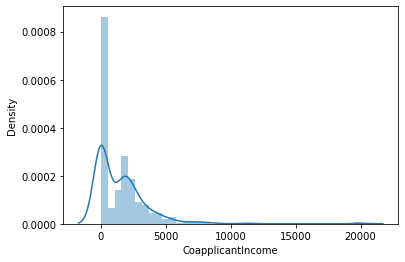

In [51]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

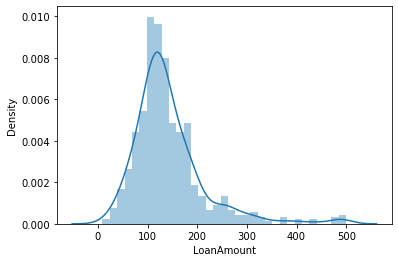

In [52]:
sns.distplot(df['LoanAmount'])

In [53]:
from sklearn.preprocessing import power_transform
df['ApplicantIncome']=power_transform(df[['ApplicantIncome']])

In [54]:
df['CoapplicantIncome']=power_transform(df[['CoapplicantIncome']])

In [55]:
df['LoanAmount']=power_transform(df[['LoanAmount']])

Skewness has been removed from the dataset

## Dividing the dataset into dependent and independent variable

In [56]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [57]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.590278,-1.109109,-0.024316,360.0,1.0,2
1,1,1,1,0,0,0.191675,0.749764,-0.024316,360.0,1.0,0
2,1,1,0,0,1,-0.515921,-1.109109,-1.346466,360.0,1.0,2
3,1,1,0,1,0,-0.770502,0.894716,-0.159213,360.0,1.0,2
4,1,0,0,0,0,0.631569,-1.109109,0.180389,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.573374,-1.109109,-1.207362,360.0,1.0,0
610,1,1,3,0,0,0.010006,-1.109109,-2.257342,180.0,1.0,0
611,1,1,1,0,0,1.107141,0.197163,1.483905,360.0,1.0,2
612,1,1,2,0,0,1.007712,-1.109109,0.795507,360.0,1.0,2


In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 606, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()

In [60]:
#selecting the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

best accuracy is 0.8032786885245902 on random_state 118


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=80)

In [63]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [64]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]

In [65]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

SVC()
0.6978021978021978
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.70      1.00      0.82       127

    accuracy                           0.70       182
   macro avg       0.35      0.50      0.41       182
weighted avg       0.49      0.70      0.57       182

[[  0  55]
 [  0 127]]
DecisionTreeClassifier()
0.7637362637362637
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        55
           1       0.84      0.82      0.83       127

    accuracy                           0.76       182
   macro avg       0.72      0.73      0.72       182
weighted avg       0.77      0.76      0.77       182

[[ 35  20]
 [ 23 104]]
LogisticRegression()
0.8351648351648352
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        55
           1       0.81      0.99      0.89       127

    accuracy               

## Ensemble Algorithm

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8351648351648352
              precision    recall  f1-score   support

           0       0.88      0.53      0.66        55
           1       0.83      0.97      0.89       127

    accuracy                           0.84       182
   macro avg       0.85      0.75      0.78       182
weighted avg       0.84      0.84      0.82       182

[[ 29  26]
 [  4 123]]


In [68]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8076923076923077
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        55
           1       0.82      0.93      0.87       127

    accuracy                           0.81       182
   macro avg       0.79      0.73      0.75       182
weighted avg       0.80      0.81      0.80       182

[[ 29  26]
 [  9 118]]


In [69]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
y_pred=gc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8241758241758241
              precision    recall  f1-score   support

           0       0.81      0.55      0.65        55
           1       0.83      0.94      0.88       127

    accuracy                           0.82       182
   macro avg       0.82      0.75      0.77       182
weighted avg       0.82      0.82      0.81       182

[[ 30  25]
 [  7 120]]


In [70]:
from sklearn.model_selection import cross_val_score

In [76]:
rf=RandomForestClassifier()
for i in range(2,30):
    cvscore=cross_val_score(rf,x,y,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.7937293729372937
for 3 accuracy is 0.7920792079207922
for 4 accuracy is 0.7871863018473335
for 5 accuracy is 0.7821704376100799
for 6 accuracy is 0.8019801980198019
for 7 accuracy is 0.7789743002253025
for 8 accuracy is 0.7855701754385964
for 9 accuracy is 0.7871183299190323
for 10 accuracy is 0.79551912568306
for 11 accuracy is 0.7953955135773317
for 12 accuracy is 0.8005555555555556
for 13 accuracy is 0.8005763893830499
for 14 accuracy is 0.7938311688311687
for 15 accuracy is 0.7873170731707315
for 16 accuracy is 0.7972528449502134
for 17 accuracy is 0.7973389355742297
for 18 accuracy is 0.7923846306199248
for 19 accuracy is 0.7856536502546689
for 20 accuracy is 0.7920967741935485
for 21 accuracy is 0.7907576823832982
for 22 accuracy is 0.7876382876382876
for 23 accuracy is 0.7971633841199057
for 24 accuracy is 0.796923076923077
for 25 accuracy is 0.7887333333333332
for 26 accuracy is 0.7904124860646599
for 27 accuracy is 0.7922705314009661
for 28 accuracy is 0.78

In [77]:
cv=13

In [78]:
svc=SVC()
dt=DecisionTreeClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier()
ex=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
lg=LogisticRegression()

In [79]:
model=[svc,dt,gn,knn,ex,rf,ad,gd,lg]

In [80]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=13)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of SVC() is 0.6898171208994519
accuracy score of DecisionTreeClassifier() is 0.706432790151569
accuracy score of GaussianNB() is 0.803920870988401
accuracy score of KNeighborsClassifier() is 0.7242225859247136
[18:40:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:12] WARNING:

## Checking AUC_ROC score

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

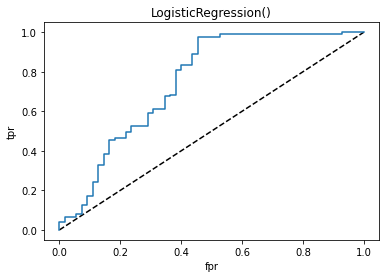

0.750035790980673


In [82]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(lg)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

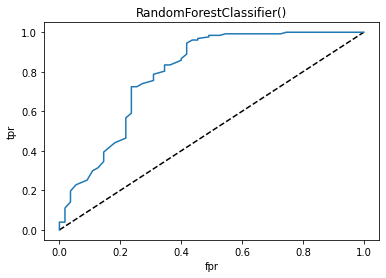

0.7958482462419472


In [83]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(rf)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

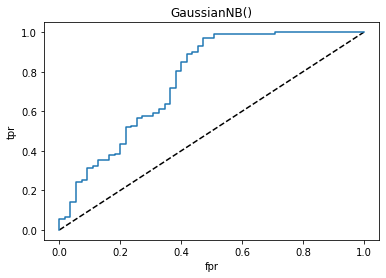

0.7607730851825341


In [84]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred_prob=gn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gn)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

[18:42:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


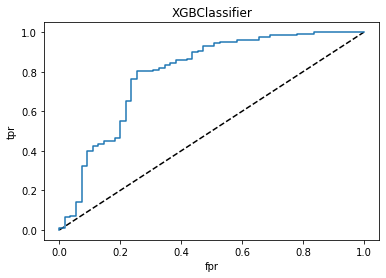

0.7937007874015748


In [85]:
ex=XGBClassifier()
ex.fit(x_train,y_train)
y_pred_prob=ex.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

Random Forest is the best algorithm for the dataset

## Hyper paramenetr tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [88]:
rf=RandomForestClassifier()
gscv=GridSearchCV(rf,parameter,cv=13)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

In [89]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy')

In [90]:
rf=RandomForestClassifier(criterion='entropy',max_features='auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8351648351648352
              precision    recall  f1-score   support

           0       0.88      0.53      0.66        55
           1       0.83      0.97      0.89       127

    accuracy                           0.84       182
   macro avg       0.85      0.75      0.78       182
weighted avg       0.84      0.84      0.82       182

[[ 29  26]
 [  4 123]]


## Saving the model

In [91]:
import joblib

In [92]:
joblib.dump(rf,'loanpred.pkl')

['loanpred.pkl']